In [4]:
'''Cervical cancer tumor vs matched control data. Data set is gene expression profiling data from tumor and matched normal samples (29 each). The data are the raw read counts (not normalized) from sequencing of microRNA. This is not my data, but was published by:
Witten, D., et al. (2010) Ultra-high throughput sequencing-based small RNA discovery and discrete statistical biomarker analysis in a collection of cervical tumours and matched controls. BMC Biology, 8:58'''

#columns starting with N are Normal while others are Tumoral (T)

'Cervical cancer tumor vs matched control data. Data set is gene expression profiling data from tumor and matched normal samples (29 each). The data are the raw read counts (not normalized) from sequencing of microRNA. This is not my data, but was published by:\nWitten, D., et al. (2010) Ultra-high throughput sequencing-based small RNA discovery and discrete statistical biomarker analysis in a collection of cervical tumours and matched controls. BMC Biology, 8:58'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
file="cervical.csv"

In [7]:
df=pd.read_csv(file,index_col="ID")

In [8]:
print(df)
df.describe()

                    N1    N2    N3     N4    N5   N6  N7    N8    N9    N10  \
ID                                                                            
let-7a             865   810  5505   6692  1456  588   9  4513  1962  10167   
let-7a*              3    12    30     73     6    2   0   199    10    173   
let-7b             975  2790  4912  24286  1759  508  33  6162  1455  18110   
let-7b*             15    18    27    119    11    3   0   116    17    233   
let-7c             828  1251  2973   6413   713  339  23  2002   476   3294   
let-7c*              0     0     0      1     0    0   0     3     0      3   
let-7d              71    98   364   1890   188   47   1   719   204   1425   
let-7d*              3    24     8     41     8    2   0    38    18     77   
let-7e             169   151   788   5801   308  121   9  1912   204   2943   
let-7e*              0     1     1      7     1    0   0    14     1      4   
let-7f             569   192  3497  14486  1134  358

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,31.441176,55.739496,100.443978,310.252101,74.063025,12.810924,1.851541,174.994398,52.253501,211.316527,...,4.345938,1718.567227,4.922969,327.081232,10.778711,220.721289,380.570028,756.754902,9.457983,22.882353
std,262.065552,484.105064,609.156811,2392.597961,748.283024,101.468029,12.781268,1069.032153,334.290337,1248.231019,...,25.442385,18710.141487,29.580298,2199.100231,82.788643,1218.359639,2638.041467,5932.809917,57.687693,185.387771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,...,0.000000,14.000000,0.000000,2.000000,0.000000,2.000000,2.000000,3.000000,0.000000,0.000000
75%,2.000000,5.000000,7.000000,15.000000,7.000000,1.000000,0.000000,16.000000,4.000000,19.000000,...,1.000000,142.250000,1.000000,34.000000,1.000000,26.000000,27.000000,49.250000,1.000000,0.000000
max,6356.000000,11170.000000,11547.000000,51377.000000,17214.000000,2433.000000,298.000000,22869.000000,5122.000000,18110.000000,...,392.000000,476438.000000,502.000000,38519.000000,1309.000000,18032.000000,52071.000000,107857.000000,1046.000000,3014.000000


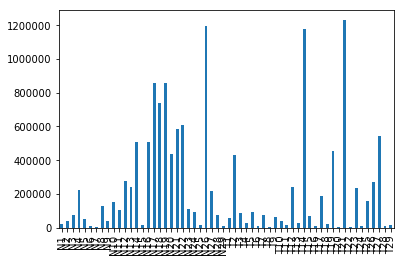

In [22]:
#Exploration
#pandas implementation of matplotlib
(df.sum()).plot.bar()
#sample sizes are very different

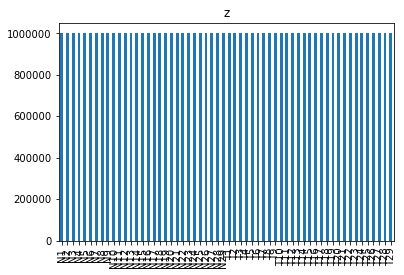

In [30]:
#cpm
cpm=df/df.sum()* 10**6
cpm.sum().plot.bar(title="cpm")


In [15]:
classes= np.array(['normal']*29 + ['tumor']*29)

In [34]:
data=cpm.transpose()
data.head()
#need to rescale the data to avoid overfitting

ID,let-7a,let-7a*,let-7b,let-7b*,let-7c,let-7c*,let-7d,let-7d*,let-7e,let-7e*,...,Candidate-57-3p,Candidate-58-3p,Candidate-58-5p,Candidate-59-3p,Candidate-59-5p,Candidate-60,Candidate-61,Candidate-62,Candidate-63,Candidate-64
N1,38531.783153,133.636242,43431.778698,668.181211,36883.602833,0.000000,3162.724398,133.636242,7528.174974,0.000000,...,0.0,89.090828,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,44.545414
N2,20352.781547,301.522690,70104.025328,452.284034,31433.740389,0.000000,2462.435298,603.045379,3794.160511,25.126891,...,0.0,50.253782,0.0,0.0,0.000000,0.000000,0.0,25.126891,50.253782,0.000000
N3,76760.042947,418.310861,68491.431599,376.479775,41454.606300,0.000000,5075.505110,111.549563,10987.631942,13.943695,...,0.0,69.718477,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,27.887391
N4,30209.461900,329.541351,109633.441676,537.197544,28949.981943,4.514265,8531.960997,185.084868,26187.251715,31.599856,...,0.0,13.542795,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,4.514265
N5,27533.518655,113.462302,33263.364914,208.014221,13483.103572,0.000000,3555.152134,151.283070,5824.398177,18.910384,...,0.0,0.000000,0.0,0.0,18.910384,94.551918,0.0,0.000000,0.000000,0.000000


In [41]:
#manually normalize data (per feature/DIMENSION)
sc_data = (data-data.mean())/data.std(ddof=1)
print(sc_data)

ID     let-7a   let-7a*    let-7b   let-7b*    let-7c   let-7c*    let-7d  \
N1   0.162342 -0.711031 -0.872585 -0.092525  0.648682 -0.486230 -0.529051   
N2  -0.530023 -0.484383 -0.094733 -0.161701  0.414112 -0.486230 -0.678276   
N3   1.618302 -0.326717 -0.141762 -0.185990  0.845425 -0.486230 -0.121456   
N4  -0.154622 -0.446557  1.058077 -0.134494  0.307208 -0.159181  0.615082   
N5  -0.256537 -0.738266 -1.169131 -0.239968 -0.358509 -0.486230 -0.445428   
N6   1.143116 -0.596260 -0.519547 -0.201531  0.656332 -0.486230 -0.108075   
N7  -1.045894 -0.891442 -1.411221 -0.306617 -0.190011 -0.486230 -1.041809   
N8   0.070472  1.258706 -0.700944 -0.009148 -0.249191  1.253271  0.023229   
N9   0.697681 -0.529596 -1.001871 -0.160621 -0.389705 -0.486230 -0.037851   
N10  1.261232  0.656491  1.361252  0.188184  0.000836  0.954277  0.809555   
N11  0.191765 -0.504416  0.330536 -0.184142  1.499810 -0.486230 -0.170584   
N12 -0.942383 -0.374094 -0.810760 -0.096126 -0.653569 -0.486230 -0.720037   

In [137]:
#Clustering
##See (Ronan et al., 2016) 


Provides a MATLAB-like plotting framework.

:mod:`~matplotlib.pylab` combines pyplot with numpy into a single namespace.
This is convenient for interactive work, but for programming it
is recommended that the namespaces be kept separate, e.g.::

    import numpy as np
    import matplotlib.pyplot as plt

    x = np.arange(0, 5, 0.1);
    y = np.sin(x)
    plt.plot(x, y)


